

<center>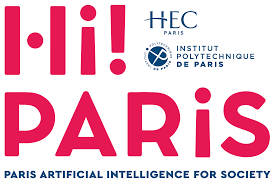</center>



# Hyperparameter Tuning

## I - Dataset

**Presentation**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

**Data Dictionary**

| Columns                  | Description                                      |   |   |   |
|--------------------------|--------------------------------------------------|---|---|---|
| Pregnancies              | To express the Number of pregnancies             |   |   |   |
| Glucose                  | To express the Glucose level in blood            |   |   |   |
| BloodPressure            | To express the Blood pressure measurement        |   |   |   |
| SkinThickness            | To express the thickness of the skin             |   |   |   |
| Insulin                  | To express the Insulin level in blood            |   |   |   |
| BMI                      | To express the Body mass index                   |   |   |   |
| DiabetesPedigreeFunction | To express the Diabetes percentage               |   |   |   |
| Age                      | To express the age                               |   |   |   |
| Outcome                  | To express the final result 1 is Yes and 0 is No |   |   |   |

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Problem to solve:**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")

In [5]:
display(df.head(3))
display(df.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Repartition of individuals with Diabetes and individuals without
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Data Preparation

In [10]:
X = df.drop('Outcome', axis=1)
y = df["Outcome"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,test_size=0.33)

## I - Concept Introduction

### What is hyperparameter tuning and why it is important?
Hyperparameter tuning (or hyperparameter optimization) is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process. Each trial is a complete execution of your training application with values for your chosen hyperparameters, set within the limits you specify. This process once finished will give you the set of hyperparameter values that are best suited for the model to give optimal results.  

 

### How to do hyperparameter tuning? How to find the best hyperparameters?
Choosing the right combination of hyperparameters requires an understanding of the hyperparameters and the business use-case. However, technically, there are two ways to set them.




#### Manual hyperparameter tuning
Manual hyperparameter tuning involves experimenting with different sets of hyperparameters manually i.e. each trial with a set of hyperparameters will be performed by you. This technique will require a robust experiment tracker which could track a variety of variables from images, logs to system metrics.

There are a few experiment trackers that tick all the boxes. Neptune is one of them. It offers an intuitive UI and an open-source package neptune-client to facilitate logging in your code. You can easily log hyperparameters and see all types of data results like images, metrics, etc. Head over to the docs to see how you can log different metadata to Neptune. 

Alternative solutions include W&B, Comet, or MLflow. Check more tools for experiment tracking & management here.

Advantages of manual hyperparameter optimization:

Tuning hyperparameters manually means more control over the process.
If you’re researching or studying tuning and how it affects the network weights then doing it manually would make sense. 
Disadvantages of manual hyperparameter optimization:

Manual tuning is a tedious process since there can be many trials and keeping track can prove costly and time-consuming.
This isn’t a very practical approach when there are a lot of hyperparameters to consider.
Read about how to manually optimize Machine Learning model hyperparameters here.




### Automated hyperparameter tuning
Automated hyperparameter tuning utilizes already existing algorithms to automate the process. The steps you follow are:

First, specify a set of hyperparameters and limits to those hyperparameters’ values (note: every algorithm requires this set to be a specific data structure, e.g. dictionaries are common while working with algorithms). 
Then the algorithm does the heavy lifting for you. It runs those trials and fetches you the best set of hyperparameters that will give optimal results.
In the blog, we will talk about some of the algorithms and tools you could use to achieve automated tuning. Let’s get to it.





### Hyperparameter tuning methods 
In this section, I will introduce all of the hyperparameter optimization methods that are popular today. 

#### Random Search
In the random search method, we create a grid of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this grid, records the performance, and lastly returns the combination of hyperparameters that provided the best performance.

#### Grid Search
In the grid search method, we create a grid of possible values for hyperparameters. Each iteration tries a combination of hyperparameters in a specific order. It fits the model on each and every combination of hyperparameters possible and records the model performance. Finally, it returns the best model with the best hyperparameters.


**Steps to Perform Hyperparameter Tuning**

* Select the right type of model.
* Review the list of parameters of the model and build the HP space
* Finding the methods for searching the hyperparameter space
* Applying the cross-validation scheme approach
* Assess the model score to evaluate the model

In the next parts we will use a Random Forest Model for exmaplifying two approaches to Hyperparameter Tuning

## II - Grid Search

This is a brute force searching technique. In this technique, we create a list of all the combination values for hyperparameters. We then iterate through all hyperparameters. Finally, it records the best performing hyperparameters used in model training. This is shown below:

Implementation of Grid Search in Python

In [16]:
# Import of the corresponding packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initiate the model
model = RandomForestClassifier(random_state=0)

# Creation of the hyperparameter space 
hyperparameter_space = { 
"n_estimators": [25,50,100,150,200], 
"criterion": ["gini", "entropy"], 
"class_weight": ["balanced","balanced_subsample"],
"min_samples_split": [0.01,0.1,0.25,0.5,0.75,1.0],
} 

# Initiate the Grid Search Class
grid_rf = GridSearchCV(model, hyperparameter_space, 
                   scoring = 'f1', cv=5, 
                   n_jobs=-1, refit = True,
                   verbose=2)

# Run the Grid Search CV

searchResults = grid_rf.fit(X_train, y_train)
print("evaluating...")
bestModel = searchResults.best_estimator_
print("Best Model using GridSearchCV: ", bestModel)
print("Top Score: {:.2f}".format(bestModel.score(X_test, y_test)))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
evaluating...
Best Model using GridSearchCV:  RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_split=0.1, n_estimators=150, random_state=0)
Top Score: 0.76


In [17]:
df_result_grid_search = pd.DataFrame(grid_rf.cv_results_)

In [18]:
display(df_result_grid_search.head(3))
display(df_result_grid_search.shape)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062514,0.006163,0.008057,0.001895,balanced,gini,0.01,25,"{'class_weight': 'balanced', 'criterion': 'gin...",0.693333,0.666667,0.725000,0.676056,0.640000,0.680211,0.028270,26
1,0.112796,0.004470,0.010372,0.000658,balanced,gini,0.01,50,"{'class_weight': 'balanced', 'criterion': 'gin...",0.702703,0.676056,0.648649,0.647887,0.583333,0.651726,0.039730,60
2,0.217565,0.013121,0.018585,0.000959,balanced,gini,0.01,100,"{'class_weight': 'balanced', 'criterion': 'gin...",0.712329,0.637681,0.657143,0.638889,0.648649,0.658938,0.027617,49


(120, 17)

Grid search is easy to implement to find the best model within the grid. However, it is computationally expensive as the number of the model continues to multiply when we add new hyperparameter values.

## III - Random Search

Like grid search, we still set the hyperparameter values we want to tune in Random Search. However, the model does not train each combination of hyperparameters, it instead selects them randomly. We have to define the number of samples we want to choose from our grid.

Implementation of Random Search in Python

In [19]:
# Import of the corresponding packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initiate the model
model = RandomForestClassifier()

# Creation of the hyperparameter space 
hyperparameter_space = { 
"n_estimators": [25,50,100,150,200], 
"criterion": ["gini", "entropy"], 
"class_weight": ["balanced","balanced_subsample"],
"min_samples_split": [0.01,0.1,0.25,0.5,0.75,1.0],
} 

# Initiate the Randomized Search Class
random_rf = RandomizedSearchCV(model, hyperparameter_space, 
                   scoring = 'f1', cv=5, 
                   n_jobs=-1, refit = True,
                   verbose=2)


# Run Random Search 
searchResults = random_rf.fit(X_train, y_train)
print("evaluating...")
bestModel = searchResults.best_estimator_
print("Best Model using GridSearchCV: ", bestModel)
print("Top Score: {:.2f}".format(bestModel.score(X_test, y_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
evaluating...
Best Model using GridSearchCV:  RandomForestClassifier(class_weight='balanced_subsample',
                       min_samples_split=0.25)
Top Score: 0.75


In [20]:
df_result_random_search = pd.DataFrame(random_rf.cv_results_)
display(df_result_random_search.head(3))
display(df_result_random_search.shape)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_criterion,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.456472,0.017950,0.030532,0.001097,200,0.75,entropy,balanced_subsample,"{'n_estimators': 200, 'min_samples_split': 0.7...",0.000000,0.000000,0.528571,0.528571,0.532374,0.317903,0.259571,6
1,0.092437,0.006121,0.011260,0.001870,50,0.75,entropy,balanced,"{'n_estimators': 50, 'min_samples_split': 0.75...",0.000000,0.000000,0.000000,0.528571,0.000000,0.105714,0.211429,10
2,0.244208,0.003802,0.018283,0.001365,100,0.25,gini,balanced_subsample,"{'n_estimators': 100, 'min_samples_split': 0.2...",0.758621,0.682353,0.733333,0.682353,0.650602,0.701452,0.038987,1


(10, 17)

Random search is computationally cheaper. However, it is not guaranteed to find the best score from the sample space.

## IV - With Neural Networks

In this example, you will go a step further. The function that you specify to the model argument when creating the KerasClassifier wrapper can take arguments. You can use these arguments to further customize the construction of the model. In addition, you know you can provide arguments to the fit() function.

In this example, you will use a grid search to evaluate different configurations for your neural network model and report on the combination that provides the best-estimated performance.

The create_model() function is defined to take two arguments, optimizer and init, both of which must have default values. This will allow you to evaluate the effect of using different optimization algorithms and weight initialization schemes for your network.

After creating your model, define the arrays of values for the parameter you wish to search, specifically:

* Optimizers for searching different weight values
* Initializers for preparing the network weights using different schemes
* Epochs for training the model for a different number of exposures to the training dataset
* Batches for varying the number of samples before a weight update


For this example we will reuse the diabetes dataframe

In [22]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# MLP for Pima Indians Dataset with grid search via sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
dataset = df

# create model
model = KerasClassifier(model=create_model, verbose=0)
print(model.get_params().keys())
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])
Best: 0.766989 using {'batch_size': 5, 'epochs': 150, 'model__init': 'normal', 'optimizer': 'adam'}
0.701833 (0.009166) with: {'batch_size': 5, 'epochs': 50, 'model__init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.701833 (0.031399) with: {'batch_size': 5, 'epochs': 50, 'model__init': 'glorot_uniform', 'optimizer': 'adam'}
0.746083 (0.019858) with: {'batch_size': 5, 'epochs': 50, 'model__init': 'normal', 'optimizer': 'rmsprop'}
0.722681 (0.017320) with: {'batch_size': 5, 'epochs': 50, 'model__init': 'normal', 'optimizer': 'adam'}
0.700467 (0.027028) with: {'batch_size': 5, 'epochs': 50, 'model__init': 'uniform', 'optimizer': 'rmsprop'}
0.704405 (0.034292) with: {'batch_size': 5, 'epochs': 50, 'model__init': 'uniform', 'optimizer': 'adam'}
0.716238 (0.035818)

You can see that the grid search discovered that using a uniform initialization scheme, rmsprop optimizer, 150 epochs, and a batch size of 10 achieved the best cross-validation score of approximately 77% on this problem.

## Congrats you made it 🚀